# ITMAL Exercise

REVISIONS| |
---------| |
2018-1219| CEF, initial.                  
2018-0214| CEF, major update and put in sync with under/overfitting exe.         
2018-0220| CEF, fixed revision table malformatting.
2018-0225| CEF, minor text updates, and made Qc optional.
2018-0225| CEF, updated code, made more functions.
2018-0311| CEF, corrected RSME to RMSE.
2019-1008| CEF, updated to ITMAL E19.

## Generalization Error

In this exercise, we need to explain all important overall concepts in training. Let's begin with Figure 5.3 from Deep Learning, Ian Goodfellow, et. al. [DL], that pretty much sums it all up

<img src="https://itundervisning.ase.au.dk/E19_itmal/L07/Figs/dl_generalization_error.png" style="height:500px">

### Qa On Generalization Error

Write a detailed description of figure 5.3 (above) for your hand-in.
 
All concepts in the figure must be explained 

* training/generalization error, 
* underfit/overfit zone, 
* optimal capacity, 
* generalization gab, 
* and the two axes: x/capacity, y/error.

### Qb A MSE-Epoch/Error Plot

Next, we look at a SGD model for fitting polynomial, that _polynomial regression_ similar to what Géron describes in [HOML] ("Polynomial Regression" + "Learning Curves"). 

Review the code below for plotting the RMSE vs. the iteration number or epoch below (three cells, part I/II/III). 

Write a short description of the code, and comment on the important points in the generation of the (R)MSE array.

The training phase output lots of lines like 

> `epoch= 104, mse_train=1.50, mse_val=2.37` <br>
> `epoch= 105, mse_train=1.49, mse_val=2.35`

What is an ___epoch___ and what is `mse_train` and `mse_val`?

NOTE: the generalization plot above (figure 5.3 in [DL]) and the plots below have different x-axis, and are not to be compared directly!

## Qa) Answer

**Capacity** is a metric for the complexity of a model, and the relationships the model is capable of describing. This often goes hand in hand the the number of parameters the model can adjust.

When a models capacity increases, so does its ability to fit and predict the data it was trained on, as seen by the always-decreasing blue line for **training error**s, which measures how well the model is predicting the traning data. 
The **underfitting and overfitting zones** say something about whether this capacity-fueled increasing ability to predict the training data, has come at the cost of its ability to generalize across different datasets.

The **generalization error** is a metric for how well the model predicts data with the same statistical properties as the training set, but not the training set specifically. In most cases, this is what we are trying to optimize the model for, as the data we will feed the model in the future will not be an exact copy of the training data, but will have similar statistical properties, which is why the **optimal capacity** is determined by the global minimum of the generalization error. This is also the amount of capacity that seperates the underfitting and overfitting zones, illustrated with a red line in the figure. As the capacity moves further from this line in any direction, the models performance decreases.

The difference between the models performance on the training data, and the models performance on non-training data, is called the **generalization gap**. This gap increases with capacity, as the model becomes more and more accustomed to the training data.

X_train.shape= (25, 1)
X_val  .shape= (25, 1)
y_train.shape= (25,)
y_val  .shape= (25,)


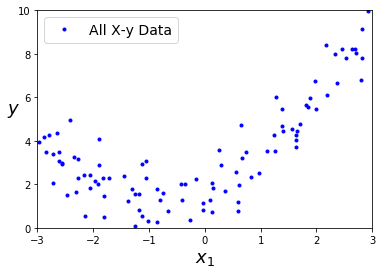

OK


In [1]:
# Run code: Qb(part I)
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

np.random.seed(42)

def GenerateData():
    m = 100
    X = 6 * np.random.rand(m, 1) - 3
    y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)
    return X, y

X, y = GenerateData()
X_train, X_val, y_train, y_val = \
    train_test_split( \
        X[:50], y[:50].ravel(), \
        test_size=0.5, \
        random_state=10)

print("X_train.shape=",X_train.shape)
print("X_val  .shape=",X_val.shape)
print("y_train.shape=",y_train.shape)
print("y_val  .shape=",y_val.shape)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled   = poly_scaler.transform(X_val)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
plt.plot(X, y, "b.", label="All X-y Data")
plt.xlabel("$x_1$", fontsize=18, )
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

print('OK')      

In [2]:
# Run code: Qb(part II)

def Train(X_train, y_train, X_val, y_val, n_epochs, verbose=False):
    print("Training...n_epochs=",n_epochs)
    train_errors, val_errors = [], []
    
    sgd_reg = SGDRegressor(max_iter=1,
                           penalty=None,
                           eta0=0.0005,
                           warm_start=True,
                           learning_rate="constant",
                           tol=-float("inf"),
                           random_state=42)

    for epoch in range(n_epochs):
        sgd_reg.fit(X_train, y_train)
        y_train_predict = sgd_reg.predict(X_train)
        y_val_predict   = sgd_reg.predict(X_val)

        mse_train=mean_squared_error(y_train, y_train_predict)
        mse_val  =mean_squared_error(y_val  , y_val_predict)

        train_errors.append(mse_train)
        val_errors  .append(mse_val)
        if verbose:
            print(f"  epoch={epoch:4d}, mse_train={mse_train:4.2f}, mse_val={mse_val:4.2f}")

    return train_errors, val_errors

n_epochs = 500
train_errors, val_errors = Train(X_train_poly_scaled, y_train, X_val_poly_scaled, y_val, n_epochs, True)

print('OK')

Training...n_epochs= 500
  epoch=   0, mse_train=11.85, mse_val=14.58
  epoch=   1, mse_train=11.51, mse_val=14.10
  epoch=   2, mse_train=11.15, mse_val=13.60
  epoch=   3, mse_train=10.81, mse_val=13.13
  epoch=   4, mse_train=10.49, mse_val=12.70
  epoch=   5, mse_train=10.18, mse_val=12.30
  epoch=   6, mse_train=9.88, mse_val=11.92
  epoch=   7, mse_train=9.60, mse_val=11.56
  epoch=   8, mse_train=9.33, mse_val=11.23
  epoch=   9, mse_train=9.07, mse_val=10.91
  epoch=  10, mse_train=8.82, mse_val=10.62
  epoch=  11, mse_train=8.59, mse_val=10.34
  epoch=  12, mse_train=8.36, mse_val=10.07
  epoch=  13, mse_train=8.14, mse_val=9.82
  epoch=  14, mse_train=7.93, mse_val=9.57
  epoch=  15, mse_train=7.72, mse_val=9.34
  epoch=  16, mse_train=7.53, mse_val=9.12
  epoch=  17, mse_train=7.34, mse_val=8.91
  epoch=  18, mse_train=7.16, mse_val=8.71
  epoch=  19, mse_train=6.98, mse_val=8.52
  epoch=  20, mse_train=6.81, mse_val=8.33
  epoch=  21, mse_train=6.65, mse_val=8.15
  epoch=  

  epoch= 239, mse_train=0.68, mse_val=1.35
  epoch= 240, mse_train=0.68, mse_val=1.35
  epoch= 241, mse_train=0.68, mse_val=1.35
  epoch= 242, mse_train=0.67, mse_val=1.35
  epoch= 243, mse_train=0.67, mse_val=1.35
  epoch= 244, mse_train=0.67, mse_val=1.35
  epoch= 245, mse_train=0.67, mse_val=1.35
  epoch= 246, mse_train=0.67, mse_val=1.35
  epoch= 247, mse_train=0.67, mse_val=1.35
  epoch= 248, mse_train=0.67, mse_val=1.35
  epoch= 249, mse_train=0.67, mse_val=1.35
  epoch= 250, mse_train=0.66, mse_val=1.35
  epoch= 251, mse_train=0.66, mse_val=1.35
  epoch= 252, mse_train=0.66, mse_val=1.35
  epoch= 253, mse_train=0.66, mse_val=1.36
  epoch= 254, mse_train=0.66, mse_val=1.36
  epoch= 255, mse_train=0.66, mse_val=1.36
  epoch= 256, mse_train=0.66, mse_val=1.36
  epoch= 257, mse_train=0.66, mse_val=1.36
  epoch= 258, mse_train=0.65, mse_val=1.36
  epoch= 259, mse_train=0.65, mse_val=1.36
  epoch= 260, mse_train=0.65, mse_val=1.36
  epoch= 261, mse_train=0.65, mse_val=1.36
  epoch= 26

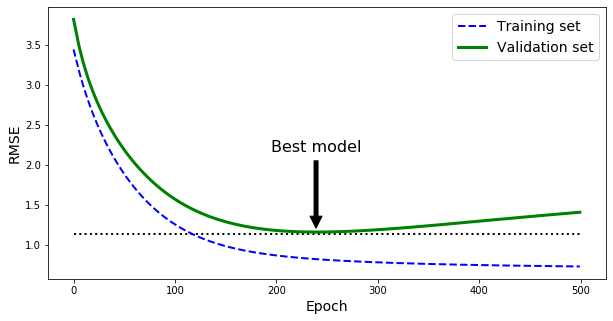

In [3]:
# Run code: Qb(part III)

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.figure(figsize=(10,5))
plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(train_errors), "b--", linewidth=2, label="Training set")
plt.plot(np.sqrt(val_errors), "g-", linewidth=3, label="Validation set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## Qb) Answer

Part 1: First, some random data is generated and split into training and test data. The data is then processed thorugh a preprocessing pipeline, consisting of the PolynomialFeatures and StandardScaler.
The original data is also plotted.

Part 2: The `Train()` function takes in the (preprocessed) training and validation data as parameters, along with the desired number of epochs.
An epoch in this case means an iteration (of the for-loop), and determines how many times the training data is fitted to the SGDRegressor, followed by a measurement of its performance.
For each iteration of the loop, the mean-squared error of both training and validation results is calculated, and appended to their respective arrays, generating the data for the plot.
The print-out displays this data as it is produced, and shows the iteration number, along with the MSE of the models predictions for both training and validation data, which resulted from that iteration

Part3: Lastly, the best epoch is found, and the data from the two arrays is plotted.
The best epoch is calculated by finding the global minimum of the entries in the validation-error array

### [OPTIONAL] Qc  Early Stopping

How would you implement ___early stopping___, in the code above? 

Try it out in the code, and write an explanation of the early stopping concept.

In [4]:
# TODO: Qc...

### Qd Explain the Polynomial RMSE-Capacity plot

Now we revisit the concepts from `capacity_under_overfitting.ipynb` notebook and the polynomial fitting with a given capacity (polynomial degree).

Peek into the cell below, and explain the generated RMSE-Capacity plot. Why does the _training error keep dropping_, while the _CV-error drops_ until around capacity 3, and then begin to rise again?

What does the x-axis _Capacity_ and y-axis _RMSE_ represent?

Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10?

Iterating...degrees= range(1, 10)
  degree=   1, rmse_training=0.48, rmse_cv=0.64
  degree=   2, rmse_training=0.17, rmse_cv=0.24
  degree=   3, rmse_training=0.11, rmse_cv=0.14
  degree=   4, rmse_training=0.11, rmse_cv=0.21
  degree=   5, rmse_training=0.10, rmse_cv=0.31
  degree=   6, rmse_training=0.10, rmse_cv=0.34
  degree=   7, rmse_training=0.10, rmse_cv=0.44
  degree=   8, rmse_training=0.10, rmse_cv=0.60
  degree=   9, rmse_training=0.10, rmse_cv=4.61


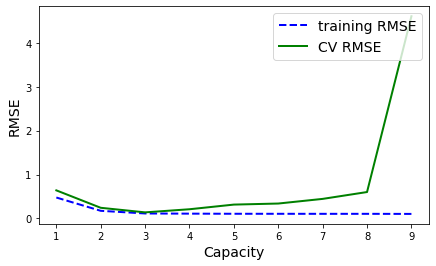

OK


In [9]:
# Run and review this code
# NOTE: modified code from [GITHOML], 04_training_linear_models.ipynb

%matplotlib inline

from math import sqrt
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData():
    n_samples = 30
    #degrees = [1, 4, 15]
    degrees = range(1,10)

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y, degrees

np.random.seed(0)
X, y, degrees  = GenerateData()

print("Iterating...degrees=",degrees)
capacities, rmses_training, rmses_cv= [], [], []
for i in range(len(degrees)):
    d=degrees[i]
    
    polynomial_features = PolynomialFeatures(degree=d, include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    
    Z = X[:, np.newaxis]
    pipeline.fit(Z, y)
    
    p = pipeline.predict(Z)
    train_rms = mean_squared_error(y,p)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, Z, y, scoring="neg_mean_squared_error", cv=10)
    score_mean = -scores.mean()
    
    rmse_training=sqrt(train_rms)
    rmse_cv=sqrt(score_mean)
    
    print(f"  degree={d:4d}, rmse_training={rmse_training:4.2f}, rmse_cv={rmse_cv:4.2f}")
    
    capacities    .append(d)
    rmses_training.append(rmse_training)
    rmses_cv      .append(rmse_cv)
    
plt.figure(figsize=(7,4))
plt.plot(capacities, rmses_training, "b--", linewidth=2, label="training RMSE")
plt.plot(capacities, rmses_cv, "g-", linewidth=2, label="CV RMSE")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Capacity", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

print('OK')

## Qd) Answer

**Why does the _training error keep dropping_ , while the _CV-error drops_ until around capacity 3, and then begin to rise again?**

The training error keeps dropping, because the increasing capacity makes the model better at fitting the training data, and therefore the predictions for the training data are more accurate as well. The cross-valudation error follows the training error up until the point of overfitting, starting at capacity $\approx 3$. After this point, the additional detail of the model only serves to model features and patterns which are speific to the training data, and since the peculiarities of the training data are not present in the validation data, the CV-error increases.  

**What does the x-axis _Capacity_ and y-axis _RMSE_ represent?**

The Capacity-axis represents the level of detail of the model, in this case the degree property of PolynomialFeatures. 
The RMSE-axis represents the performance of the model - a measure of the proportion of correct predictions with regard to a given type of input data

**Try increasing the model capacity. What happens when you do plots for `degrees` larger than around 10?**

As the threshold for overfitting is at capacity $\approx 3$, a larger capacity only selves to increase the generalization gap, exponentially it seems. For values of `degrees` $\geq$ 10, the CV error explodes, and the minimum becomes almost invisible in the plot